In [2]:
import networkExpansionPy.lib as ne
import numpy as np
import pandas as pd
import pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,pearsonr,mannwhitneyu
from statsmodels.stats.multitest import multipletests
plt.rcParams['font.family'] = 'Arial'
import re


import warnings
from scipy.sparse import (spdiags, SparseEfficiencyWarning, csc_matrix,
    csr_matrix, isspmatrix, dok_matrix, lil_matrix, bsr_matrix)
warnings.simplefilter('ignore',SparseEfficiencyWarning)


seed = pd.read_csv('../assets/seed_set.csv')
#background = seed[seed["Type"].isin(["Background"])].ID.tolist()
#cpd_base = seed[~seed["Type"].isin(['Sulfur source',"Nitrogen source"])].ID.tolist()

In [28]:
model_tags = ["01May2023","AcP","PEP","Glc6P","Glyc3P","UTP","CTP","Creatine"]
model_names = ["PolyP","Acetyl-P","PEP","Glucose-6P","Glycerol-3P","UTP","CTP","Creatine-P"]
unchanged = ["C00009","C00033","C00022","C00031","C00116","C00015","C00112","C00300"]
models = list(zip(model_tags,model_names,unchanged))

In [31]:
# load the metabolism object from the repo
results = {"model":[],"# compounds":[],"# reactions":[],"added uncharged":[]}
for tag,name,added_met in models:
    model_id = f"metabolism.v8.{tag}.pkl"
    metabolism = pd.read_pickle('/Users/joshuagoldford/Documents/github/network-expansion-assets/models/' + model_id)
    c,r = metabolism.expand(seed.ID.tolist())
    results["model"].append(name)
    results["# compounds"].append(len(c))
    results["# reactions"].append(len(r))
    results["added uncharged"].append(False)
    
    c,r = metabolism.expand(seed.ID.tolist() + [added_met])
    results["model"].append(name)
    results["# compounds"].append(len(c))
    results["# reactions"].append(len(r))
    results["added uncharged"].append(True)
    
results = pd.DataFrame(results)

In [44]:
results[~results["added uncharged"]]

,model,# compounds,# reactions,added uncharged
0,PolyP,4315,12534,False
2,Acetyl-P,4315,12534,False
4,PEP,4315,12534,False
6,Glucose-6P,4315,12534,False
8,Glycerol-3P,429,1202,False
10,UTP,429,1202,False
12,CTP,429,1202,False
14,Creatine-P,429,1202,False


No handles with labels found to put in legend.


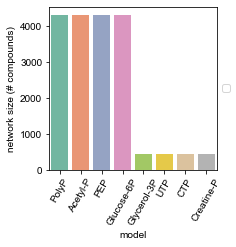

In [46]:
plt.figure(figsize=(3,3))
ax = sns.barplot(x="model",y="# compounds",data=results[~results["added uncharged"]],palette="Set2")
plt.xticks(rotation=60)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("network size (# compounds)")
plt.savefig("figs/figS2_alt_phosphate.svg")